In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
red = pd.read_csv('./data/winequality-red.csv', sep=';')
white = pd.read_csv('./data/winequality-white.csv', sep=';')

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
red['tag'] = 'r'
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


In [9]:
white['tag'] = 'w'

In [10]:
wine = pd.concat([red, white])

In [11]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
tag                     6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


Text(0, 0.5, 'Counts')

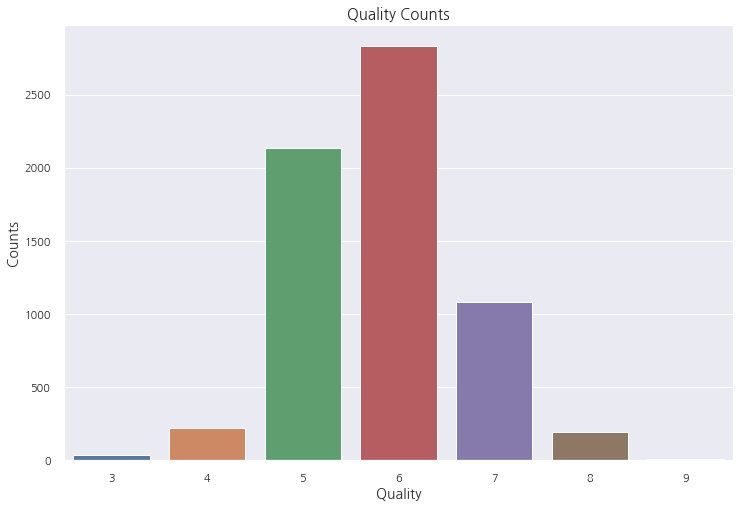

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=wine, x='quality')

plt.title("Quality Counts", fontsize=15)
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Counts",fontsize=14)

In [14]:
tag1 = wine.groupby(['tag'])['quality'].value_counts().unstack(0)
tag1

tag,r,w
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


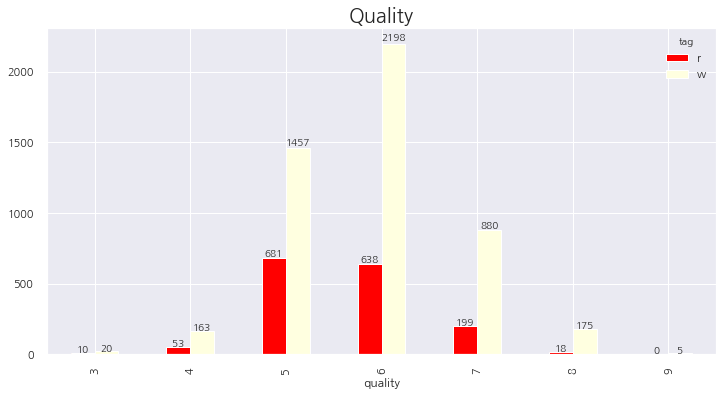

In [15]:
ax = tag1.plot(kind='bar', color=['red', 'lightyellow'], figsize=(12,6))

ax.set_title('Quality', size=20)

for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate("%.0f"%(height), (left+width/2, height*1.01), ha='center')

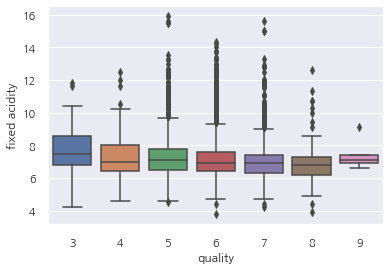

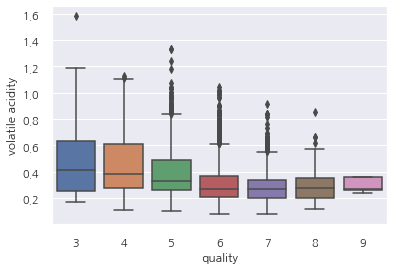

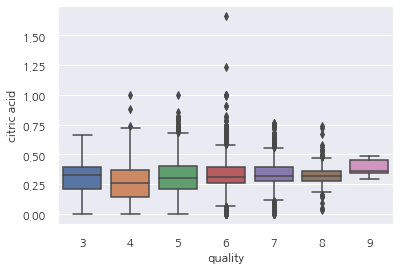

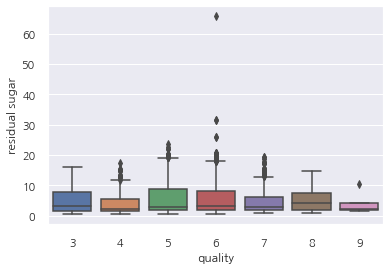

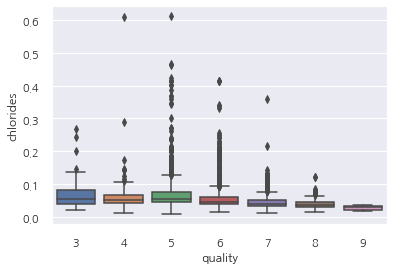

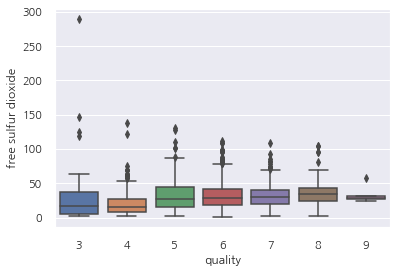

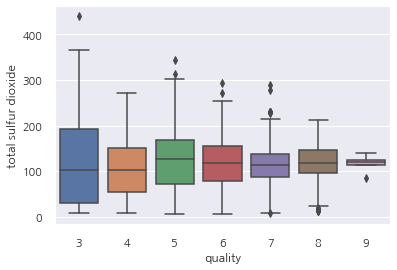

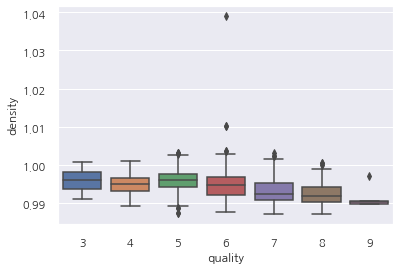

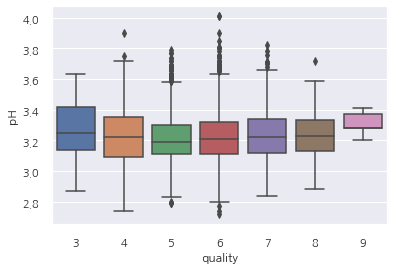

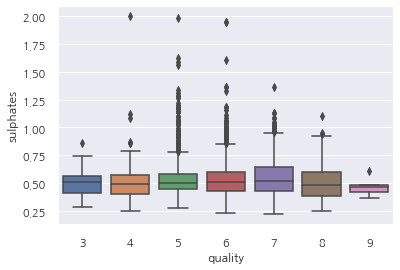

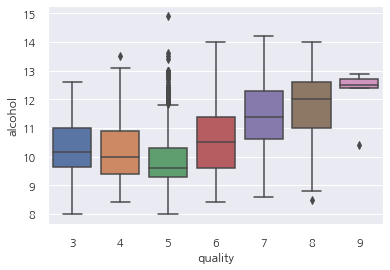

In [16]:
for i in wine.columns:
  if i == "quality":
    break
  sns.boxplot('quality', i, data=wine)
  plt.show()

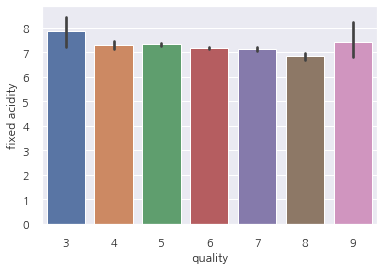

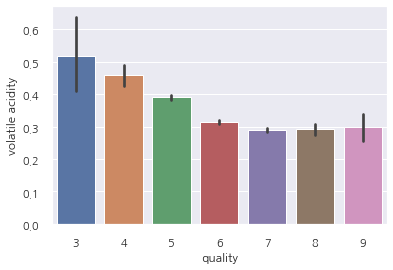

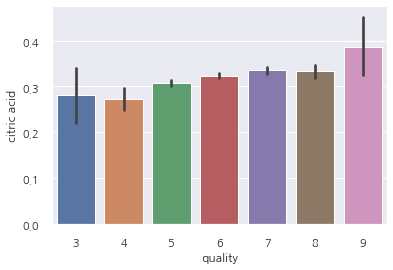

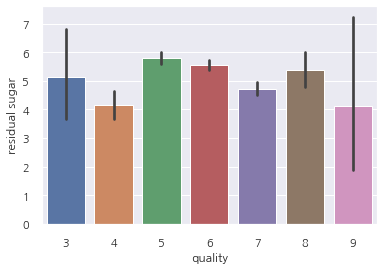

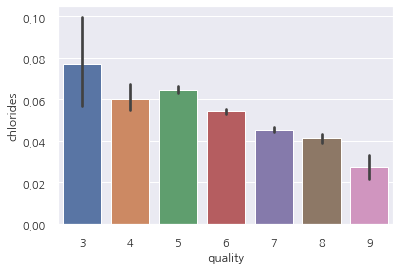

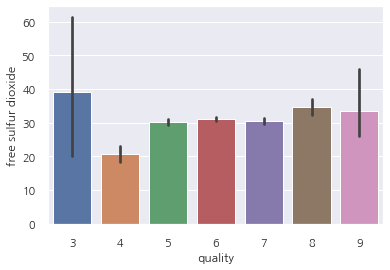

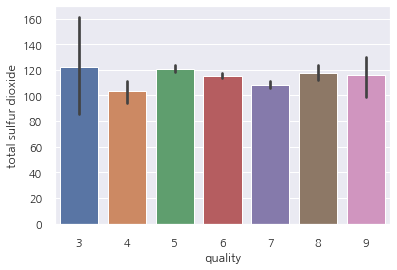

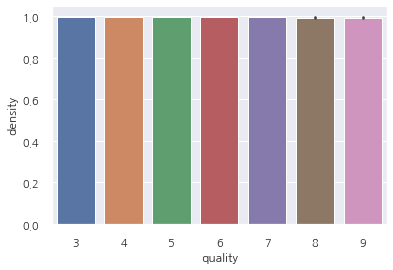

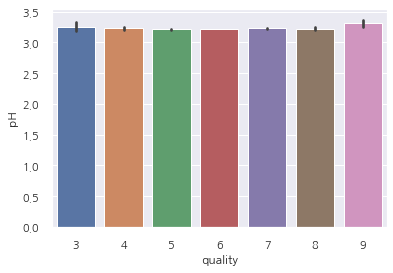

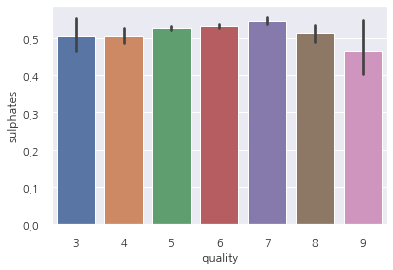

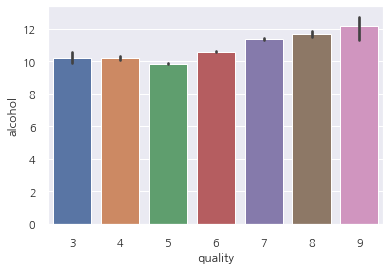

In [17]:
for i in wine.columns:
  if i == 'quality':
    break
  sns.barplot('quality', i, data=wine)
  plt.show()

In [19]:
reviews = []
for score in wine['quality']:
  if score >= 3 and score < 7:
    reviews.append(0)
  else:
    reviews.append(1)
wine['good'] = reviews

In [20]:
wine.groupby(['tag', 'good'])['good'].agg(['count'])

count
tag good       
r   0      1382
    1       217
w   0      3838
    1      1060

In [21]:
rw = wine[wine.tag == 'r']
ww = wine[wine.tag =='w']

In [22]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [23]:
Xt = wine.iloc[:,:-3]
yt = wine['good']

Xr = rw.iloc[:, :-3]
yr = rw['good']

Xw = ww.iloc[:, :-3]
yw = ww['good']

In [24]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.2, random_state = 42)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size = 0.2, random_state = 42)

In [25]:
scaler = StandardScaler()

Xt_train = scaler.fit_transform(Xt_train)
Xt_test = scaler.fit_transform(Xt_test)

Xr_train = scaler.fit_transform(Xr_train)
Xr_test = scaler.fit_transform(Xr_test)

Xw_train = scaler.fit_transform(Xw_train)
Xw_test = scaler.fit_transform(Xw_test)

In [26]:
logt = LogisticRegression()
logt.fit(Xt_train, yt_train)
pred_logt = logt.predict(Xt_test)

logr = LogisticRegression()
logr.fit(Xr_train, yr_train)
pred_logr = logr.predict(Xr_test)

logw = LogisticRegression()
logw.fit(Xw_train, yw_train)
pred_logw = logw.predict(Xw_test)

In [27]:
print(accuracy_score(pred_logt, yt_test))
print(accuracy_score(pred_logr, yr_test))
print(accuracy_score(pred_logw, yw_test))

0.8292307692307692
0.875
0.7857142857142857


In [28]:
svct = SVC()
svct.fit(Xt_train, yt_train)
pred_svct = svct.predict(Xt_test)

svcr = SVC()
svcr.fit(Xr_train, yr_train)
pred_svcr = svcr.predict(Xr_test)

svcw = SVC()
svcw.fit(Xw_train, yw_train)
pred_svcw = svcw.predict(Xw_test)

In [30]:
print(accuracy_score(pred_svct, yt_test))
print(accuracy_score(pred_svcr, yr_test))
print(accuracy_score(pred_svcw, yw_test))

0.8369230769230769
0.875
0.8204081632653061


In [31]:
rfct = RandomForestClassifier()
rfct.fit(Xt_train, yt_train)
pred_rfct = rfct.predict(Xt_test)

rfcr = RandomForestClassifier()
rfcr.fit(Xr_train, yr_train)
pred_rfcr = rfcr.predict(Xr_test)

rfcw = RandomForestClassifier()
rfcw.fit(Xw_train, yw_train)
pred_rfcw = rfcw.predict(Xw_test)

In [32]:
print(accuracy_score(pred_rfct, yt_test))
print(accuracy_score(pred_rfcr, yr_test))
print(accuracy_score(pred_rfcw, yw_test))

0.86
0.878125
0.8612244897959184


In [33]:
rest = [accuracy_score(pred_logt, yt_test), accuracy_score(pred_svct, yt_test), accuracy_score(pred_rfct, yt_test)]
resr = [accuracy_score(pred_logr, yr_test), accuracy_score(pred_svcr, yr_test), accuracy_score(pred_rfcr, yr_test)]
resw = [accuracy_score(pred_logw, yw_test), accuracy_score(pred_svcw, yw_test), accuracy_score(pred_rfcw, yw_test)]

In [34]:
df = pd.DataFrame(np.c_[rest, resr, resw], columns=['Total', 'red', 'White'], index=['Log','SVC', 'RFC'])
df

,Total,red,White
Log,0.829231,0.875000,0.785714
SVC,0.836923,0.875000,0.820408
RFC,0.860000,0.878125,0.861224


Text(0, 0.5, 'Accuracy')

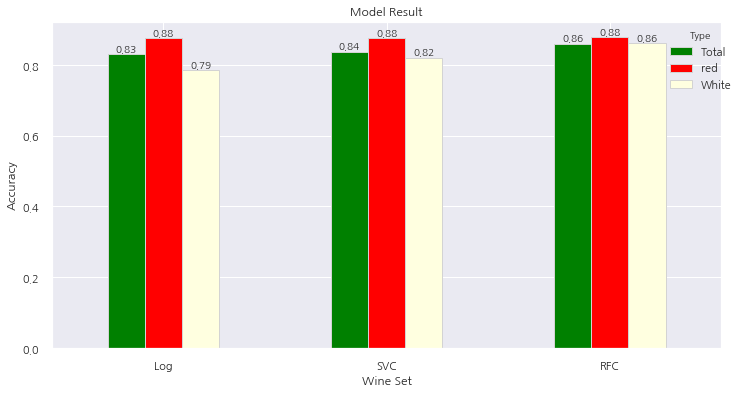

In [36]:
ax = df.plot(kind='bar', color=['green', 'red', 'lightyellow'], edgecolor='lightgray', figsize=(12, 6))

ax.set_title("Wine Modeling Result")
ax.set_xticklabels(['Log', 'SVC', 'RFC'], rotation=0)
ax.legend(title='Type', bbox_to_anchor=(1.03, 1))

for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate("%.2f"%(height), (left+width/2, height*1.01), ha='center')

plt.title("Model Result")
plt.xlabel("Wine Set")
plt.ylabel("Accuracy")